In [24]:
import cv2
import numpy as np
import os
from math import atan, atan2, cos, sin, sqrt, pi
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
from itertools import chain
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

In [25]:
grid = ['image_2', 'image_3', 'image_5', 'image_6', 'image_8', 'image_11', 'image_12', 'image_13', 'image_14', 'image_15', 'image_16', 'image_18', \
        'image_19', 'image_20', 'image_21', 'image_22', 'image_23', 'image_24', 'image_25', 'image_26', 'image_27', 'image_28', 'image_29', 'image_30', \
       'image_32', 'image_33', 'image_34', 'image_35', 'image_45', 'image_46', 'image_47', 'image_48', 'image_58', 'image_59', 'image_70', 'image_72', \
       'image_102', 'image_104', 'image_106', 'image_114', 'image_116', 'image_125', 'image_126', 'image_128', 'image_153', 'image_157', 'image_158', 'image_159', \
       'image_1', 'image_4', 'image_7', 'image_10', 'image_17', 'image_31', 'image_36', 'image_57', 'image_60', 'image_71', 'image_105', 'image_107', 'image_108', \
       'image_115', 'image_155', 'image_156', 'image_160', 'image_9', 'image_69', 'image_101', 'image_113','image_127', 'image_156']

small_grid = ['image_37', 'image_39', 'image_40', 'image_41', 'image_43', 'image_44', 'image_49', 'image_50', 'image_51', 'image_52', 'image_53', 'image_54', \
        'image_56', 'image_73', 'image_74', 'image_76', 'image_93', 'image_94', 'image_95', 'image_96', 'image_98', 'image_100', 'image_110', 'image_112', \
       'image_129', 'image_131', 'image_133', 'image_134', 'image_136', 'image_137', 'image_139', 'image_140', 'image_142', 'image_144', 'image_149', 'image_150', \
        'image_151', 'image_152', 'image_161', 'image_162', 'image_55', 'image_75', 'image_99', 'image_111', 'image_130', 'image_138', 'image_147', 'image_163', \
        'image_164', 'image_97', 'image_109', 'image_132', 'image_135', 'image_141', 'image_143', 'image_145', 'image_146']

no_grid = ['image_62', 'image_64', 'image_65', 'image_66', 'image_67', 'image_68', 'image_77', 'image_79', 'image_80', 'image_81', 'image_83', 'image_84', \
        'image_85', 'image_86', 'image_87', 'image_89', 'image_90', 'image_91', 'image_92', 'image_117', 'image_118', 'image_119', 'image_120', 'image_122', \
       'image_42', 'image_61', 'image_78', 'image_82', 'image_123', 'image_38', 'image_63', 'image_88', 'image_121']

other = ['image_103', 'image_148']

In [26]:
#not needed anymore since we hardcoded the categories of images but this code was classifying images based on whether we could detect the grid or not 
"""
PATH = ['ternausnet/test_data/images/', 'ternausnet/train_data/images/', 'ternausnet/val_data/images/']
#PATH = 'ternausnet/train_data/images/'

result = pd.DataFrame()
true_angles = [0.23, 0.51]

#most_common = []
for path in PATH : 
    for root, _, files in os.walk(path):
        images = [os.path.join(root, f) for f in files]
        for image in images : 
            # Read image 
            image_name = os.path.splitext(os.path.basename(image))[0]
            img = cv2.imread(image, cv2.IMREAD_COLOR) # road.png is the filename
            # Convert the image to gray-scale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Find the edges in the image using canny detector
            edges = cv2.Canny(gray, 110, 140)
            lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=800, maxLineGap=800)
            # Draw lines on the image
            angles = []
            if lines is not None: 
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    slope = ((y2-y1)/(x1-x2))
                    angles.append(round(slope, 2))
                    #cv2.line(edges, (x1, y1), (x2, y2), (255, 0, 0), 3)
                # Show result
                #print(an220gles)
                c = Counter(angles)
                #c.most_common(1)
                most_commons = c.most_common(3)
                #print ("",most_commons)
                #most_common.append(c.most_common(1)[0][0])
                if most_commons[0][0] in true_angles :
                    result[image_name] = [int(np.rad2deg(tan(most_commons[0][0])))]
                elif len(most_commons) > 1 : 
                    if most_commons[1][0] in true_angles :
                        result[image_name] = [int(np.rad2deg(tan(most_commons[1][0])))]
            
            if lines is not None: 
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    slope = ((y2-y1)/(x1-x2))
                    if round(slope, 2) == 0.23 or round(slope, 2) == 0.51:
                        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
            #cv2.imshow("Result Image", img)
            #cv2.waitKey(0)
            
result
"""

'\nPATH = [\'ternausnet/test_data/images/\', \'ternausnet/train_data/images/\', \'ternausnet/val_data/images/\']\n#PATH = \'ternausnet/train_data/images/\'\n\nresult = pd.DataFrame()\ntrue_angles = [0.23, 0.51]\n\n#most_common = []\nfor path in PATH : \n    for root, _, files in os.walk(path):\n        images = [os.path.join(root, f) for f in files]\n        for image in images : \n            # Read image \n            image_name = os.path.splitext(os.path.basename(image))[0]\n            img = cv2.imread(image, cv2.IMREAD_COLOR) # road.png is the filename\n            # Convert the image to gray-scale\n            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n            # Find the edges in the image using canny detector\n            edges = cv2.Canny(gray, 110, 140)\n            lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=800, maxLineGap=800)\n            # Draw lines on the image\n            angles = []\n            if lines is not None: \n                for l

In [27]:
def getPCA(pts, img): 
  ## [pca] 
  # Construct a buffer used by the pca analysis 
  sz = len(pts) 
  data_pts = np.empty((sz, 2), dtype=np.float64) 
  for i in range(data_pts.shape[0]): 
    data_pts[i,0] = pts[i,0,0] 
    data_pts[i,1] = pts[i,0,1]

  # Perform PCA analysis 
  mean = np.empty((0)) 
  mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean) 
  angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians 
  return angle 

In [28]:
# Load the image 
#PATH = ['ternausnet/test_data/masks_with_axons/', 'ternausnet/train_data/masks_with_axons/', 'ternausnet/val_data/masks_with_axons/']
PATH = ['ternausnet/data/masks_with_axons/']
masks = pd.DataFrame()
for path in PATH : 
    for root, _, files in os.walk(path):
        images = [os.path.join(root, f) for f in files]
        for image in images : 
            angles = []
            image_name = os.path.splitext(os.path.basename(image))[0]
            image_name = re.sub('mask', 'image', image_name)
            img = cv2.imread(image)#, cv2.IMREAD_GRAYSCALE)
            th, threshed = cv2.threshold(img, 240, 256, cv2.THRESH_BINARY_INV)
            threshed = cv2.cvtColor(threshed, cv2.COLOR_BGR2GRAY)
            contours, _ = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            #threshed = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
            #thresh_image = img.astype(np.uint8)
            #contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            for i,c in enumerate(contours):
              # area of each contour
              area = cv2.contourArea(c)
              # ignore contour which is too small or large
              if area < 1e2 or 1e5 < area:
                continue

              # draw each contour only for visualization
              cv2.drawContours(img, contours, i, (0, 0, 255), 2)
              # find orientation of each shape
              angle = int(np.rad2deg(getPCA(c,img))) + 90
              if angle >= 180 : 
                angle = angle-180
              angles.append(angle)
            masks[image_name] = [angles]
            #cv2.imshow('Result',img)
            #cv2.waitKey(0) 
            #cv2.destroyAllWindows()
            
masks

/home/james/anaconda3/envs/ml_r/lib/python3.7/site-packages/ipykernel_launcher.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,image_99,image_118,image_35,image_151,image_50,image_63,image_62,image_119,image_127,image_37,...,image_140,image_17,image_130,image_84,image_80,image_8,image_92,image_19,image_23,image_31
0,"[111, 143, 64]","[105, 133]","[85, 92]","[92, 49, 69, 68, 93]","[106, 81, 68]",[23],"[41, 130, 80]","[32, 78]","[64, 148, 123]","[103, 163]",...,"[90, 30]","[55, 57, 14, 98]","[46, 92]",[],[144],[152],[64],[38],"[90, 126, 49, 118, 102, 51, 66]",[]


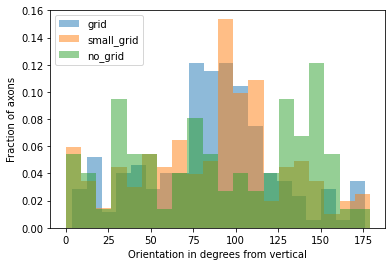

In [29]:
g = []
s_g=[]
n_g = []
for image in masks:
    if image in grid:
        g.append(masks[image][0]) #- result[image][0]*np.ones(len(masks[image][0])))
    elif image in small_grid : 
        s_g.append(masks[image][0])
    elif image in no_grid : 
        n_g.append(masks[image][0])

x, bins, p=plt.hist(list(chain.from_iterable(g)), alpha=0.5, label='grid', bins=20)
for item in p:
    item.set_height(item.get_height()/sum(x))
x, bins, p=plt.hist(list(chain.from_iterable(s_g)), alpha=0.5, label='small_grid', bins=20)
for item in p:
    item.set_height(item.get_height()/sum(x))
x, bins, p=plt.hist(list(chain.from_iterable(n_g)), alpha=0.5, label='no_grid', bins=20)
for item in p:
    item.set_height(item.get_height()/sum(x))
plt.ylim([0, 0.16])
plt.xlabel('Orientation in degrees from vertical')
plt.ylabel('Fraction of axons')
plt.legend()
#plt.show()
plt.savefig('histogram.png')

In [30]:
from scipy.stats import ks_2samp
print(ks_2samp(list(chain.from_iterable(g)), list(chain.from_iterable(s_g))))
print(ks_2samp(list(chain.from_iterable(g)), list(chain.from_iterable(n_g))))
print(ks_2samp(list(chain.from_iterable(s_g)), list(chain.from_iterable(n_g))))

KstestResult(statistic=0.09036799633720598, pvalue=0.400643938249875)
KstestResult(statistic=0.2608967348851742, pvalue=0.0013479471279123079)
KstestResult(statistic=0.2073856034252074, pvalue=0.015771546862439534)


In [38]:
#PATH = ['ternausnet/test_data/images/', 'ternausnet/train_data/images/', 'ternausnet/val_data/images/']
#PATH = 'ternausnet/train_data/images/'
PATH = ['ternausnet/data/images/']

image_grid_23 = []
image_grid_51 = []
true_angles = [int(np.rad2deg(atan(0.23))), int(np.rad2deg(atan(0.51)))]

for path in PATH : 
    for root, _, files in os.walk(path):
        images = [os.path.join(root, f) for f in files]
        for image in images :
            angle_grid = 0
            # Read image 
            image_name = os.path.splitext(os.path.basename(image))[0]
            image_name = re.sub('mask', 'image', image_name)
            img = cv2.imread(image, cv2.IMREAD_COLOR) # road.png is the filename
            # Convert the image to gray-scale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Find the edges in the image using canny detector
            edges = cv2.Canny(gray, 110, 140)
            lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=800, maxLineGap=800)
            # Draw lines on the image
            angles = []
            if lines is not None: 
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    slope = ((y2-y1)/(x1-x2))
                    angles.append(int(np.rad2deg(atan(round(slope, 2)))))
                    #angles.append(round(slope, 2))
                c = Counter(angles)
                most_commons = c.most_common(3)
                if most_commons[0][0] in true_angles :
                    angle_grid = most_commons[0][0]
                    if angle_grid == true_angles[0] : 
                        image_grid_23.append(masks[image_name].values[0])
                    else : 
                        image_grid_51.append(masks[image_name].values[0])
                elif len(most_commons) > 1 : 
                    if most_commons[1][0] in true_angles :
                        angle_grid = most_commons[1][0]
                        if angle_grid == true_angles[0] : 
                            image_grid_23.append(masks[image_name].values[0])
                        else : 
                            image_grid_51.append(masks[image_name].values[0])

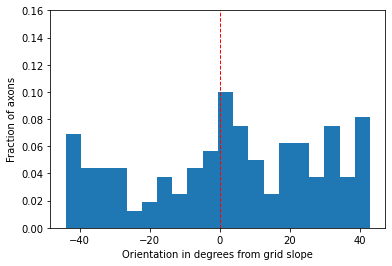

In [39]:
images_23 = list(chain.from_iterable(image_grid_23))
images_51 = list(chain.from_iterable(image_grid_51))
values = np.concatenate((images_23-(90-int(np.rad2deg(atan(0.23))))*np.ones(len(images_23)), images_51-(90-int(np.rad2deg(atan(0.51))))*np.ones(len(images_51))), axis=None)
for i in range(len(values)) : 
    if values[i] <-45 : values[i] += 90
    elif values[i] >45 : values[i] -= 90
x, bins, p=plt.hist(values, bins=20)
for item in p:
    item.set_height(item.get_height()/sum(x))
plt.axvline(0, color='r', linestyle='dashed', linewidth=1)
plt.ylim([0, 0.16])
plt.xlabel('Orientation in degrees from grid slope')
plt.ylabel('Fraction of axons')
plt.savefig('histogram_orientation.png')
plt.show()

In [40]:
from scipy import stats
print(stats.normaltest(values))
print(stats.kstest(values, stats.uniform(loc=0, scale=1).cdf))
print(stats.kstest(values, 'uniform'))

NormaltestResult(statistic=28.92892939513648, pvalue=5.225920493765014e-07)
KstestResult(statistic=0.5875, pvalue=4.386324300626611e-53)
KstestResult(statistic=0.5875, pvalue=4.386324300626611e-53)


Thus the distribution is neither normal nor uniform

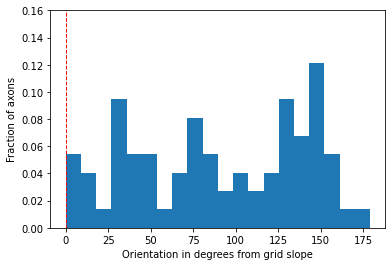

In [47]:
no_grid_angles = [item for sublist in n_g for item in sublist]#maks[no_grid] #(n_g ?)
x, bins, p=plt.hist(no_grid_angles, bins=20)
for item in p:
    item.set_height(item.get_height()/sum(x))
plt.axvline(0, color='r', linestyle='dashed', linewidth=1)
plt.ylim([0, 0.16])
plt.xlabel('Orientation in degrees from grid slope')
plt.ylabel('Fraction of axons')
plt.savefig('histogram_orientation.png')
plt.show()

In [48]:
#is the distribution without any grid compatible with a uniform distribution?
print(stats.normaltest(no_grid_angles))
print(stats.kstest(no_grid_angles, stats.uniform(loc=0, scale=1).cdf))
print(stats.kstest(no_grid_angles, 'uniform'))

NormaltestResult(statistic=27.275881520189756, pvalue=1.1943114153855264e-06)
KstestResult(statistic=0.9864864864864865, pvalue=9.503481542461166e-139)
KstestResult(statistic=0.9864864864864865, pvalue=9.503481542461166e-139)


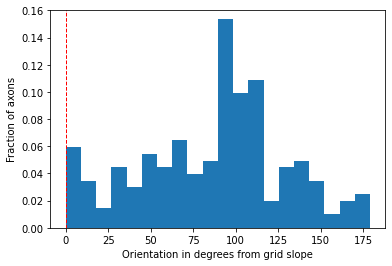

In [49]:
small_grid_angles = [item for sublist in s_g for item in sublist]#maks[no_grid] #(n_g ?)
x, bins, p=plt.hist(small_grid_angles, bins=20)
for item in p:
    item.set_height(item.get_height()/sum(x))
plt.axvline(0, color='r', linestyle='dashed', linewidth=1)
plt.ylim([0, 0.16])
plt.xlabel('Orientation in degrees from grid slope')
plt.ylabel('Fraction of axons')
plt.savefig('histogram_orientation.png')
plt.show()

In [51]:
# istribution with the small grid (adding the information of the slope manually)?)
print(stats.normaltest(small_grid_angles))
print(stats.kstest(small_grid_angles, stats.uniform(loc=0, scale=1).cdf))
print(stats.kstest(small_grid_angles, 'uniform'))

NormaltestResult(statistic=4.6772487473648745, pvalue=0.09646024024925416)
KstestResult(statistic=0.995049504950495, pvalue=0.0)
KstestResult(statistic=0.995049504950495, pvalue=0.0)
